In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import glob
import re
import itertools
import shutil
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from sklearn.metrics import confusion_matrix

# Data Prep

In [3]:
os.getcwd()

'C:\\Users\\ratho\\Desktop\\CI\\Project_B_Data\\DATA'

In [4]:
os.chdir('C:\\Users\\ratho\\Desktop\\CI\\Project_B_Data\\DATA\\imdata2')

In [5]:
os.getcwd()

'C:\\Users\\ratho\\Desktop\\CI\\Project_B_Data\\DATA\\imdata2'

## Reading all the image paths present in a folder and classifying it into 16 different folders on the basis of x and y coordinates: 

In [ ]:
fp = glob.glob("imdata2/*.png")
im_paths = pd.Series(fp, name = 'image_paths').astype(str)
im_paths

In [ ]:
x_coordi = []
y_coordi = []
folder_path = 'imdata2'

for i in range(len(im_paths)):
    w = os.path.splitext(os.path.split(im_paths[i])[1])[0]
    x_coordi.append(w.split('_')[0])
    y_coordi.append(w.split('_')[1])
    
    ######################################################################## splitting Q2
    if ('175'<=x_coordi[i] <= '213' and '250'< y_coordi[i] <= '288'):
        folder_name = 'q23'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('213'< x_coordi[i] <= '250' and '288'< y_coordi[i] <= '325'):
        folder_name = 'q21'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('175'<=x_coordi[i] <= '213' and '288'< y_coordi[i] <= '325'):
        folder_name = 'q22'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('213'< x_coordi[i] <= '250' and '250'< y_coordi[i] <= '288'):
        folder_name = 'q24'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)
    ################################################################################## splitting Q3
    
    if ('175'<=x_coordi[i] <= '213' and '175'<=y_coordi[i] <= '213'):
        folder_name = 'q33'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('213'< x_coordi[i] <= '250' and '213'< y_coordi[i] <= '250'):
        folder_name = 'q31'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('175'<=x_coordi[i] <= '213' and '213'< y_coordi[i] <= '250'):
        folder_name = 'q32'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('213'< x_coordi[i] <= '250' and '175'<=y_coordi[i] <= '213'):
        folder_name = 'q34'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)
    #################################################################################  splitting Q1
    
    if ('250'< x_coordi[i] <= '288' and '250'< y_coordi[i] <= '288'):
        folder_name = 'q13'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('288'< x_coordi[i] <= '325' and '288'< y_coordi[i] <= '325'):
        folder_name = 'q11'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('250'< x_coordi[i] <= '288' and '288'< y_coordi[i] <= '325'):
        folder_name = 'q12'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('288'< x_coordi[i] <= '325' and '250'< y_coordi[i] <= '288'):
        folder_name = 'q14'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)
    ###############################################################################  spliting Q4
    
    if ('250'< x_coordi[i] <= '288' and '175'<=y_coordi[i] <= '213'):
        folder_name = 'q43'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('288'< x_coordi[i] <= '325' and '213'< y_coordi[i] <= '250'):
        folder_name = 'q41'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('250'< x_coordi[i] <= '288' and '213'< y_coordi[i] <= '250'):
        folder_name = 'q42'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

    if ('288'< x_coordi[i] <= '325' and '175'<=y_coordi[i] <= '213'):
        folder_name = 'q44'
        new_path = os.path.join(folder_path, folder_name)
        if not os.path.exists(new_path):
            os.makedirs(new_path)

        old_image_path = os.path.join(im_paths[i])
        new_image_path = os.path.join(new_path, os.path.split(im_paths[i])[1])
        shutil.move(old_image_path, new_image_path)

## manually splitting the training and validation data, since there were some shape errors while running CNN by using automatic train, test split functions on dataframe (which i dont have any clues about)

In [6]:
if os.path.isdir('imdata2/val_q11') is False:
    ##########################################################  creating validation folders
    os.makedirs('val_q11')
    os.makedirs('val_q12')
    os.makedirs('val_q13')
    os.makedirs('val_q14')
    
    os.makedirs('val_q21')
    os.makedirs('val_q22')
    os.makedirs('val_q23')
    os.makedirs('val_q24')
    
    os.makedirs('val_q31')
    os.makedirs('val_q32')
    os.makedirs('val_q33')
    os.makedirs('val_q34')
    
    os.makedirs('val_q41')
    os.makedirs('val_q42')
    os.makedirs('val_q43')
    os.makedirs('val_q44')
    ############################################################  creating training folders
    
    os.makedirs('tr_q11')
    os.makedirs('tr_q12')
    os.makedirs('tr_q13')
    os.makedirs('tr_q14')
    
    os.makedirs('tr_q21')
    os.makedirs('tr_q22')
    os.makedirs('tr_q23')
    os.makedirs('tr_q24')
    
    os.makedirs('tr_q31')
    os.makedirs('tr_q32')
    os.makedirs('tr_q33')
    os.makedirs('tr_q34')
    
    os.makedirs('tr_q41')
    os.makedirs('tr_q42')
    os.makedirs('tr_q43')
    os.makedirs('tr_q44')
    

In [ ]:
#######################################################  moving some files randomly from q11 to tr_q11 and some to val_q11
#######################################################  and doing this for each of the 16 folders
for c in random.sample(glob.glob('q11\*.png'), 54):
    shutil.move(c,'tr_q11')
for c in random.sample(glob.glob('q12\*.png'), 46):
    shutil.move(c,'tr_q12')
for c in random.sample(glob.glob('q13\*.png'), 33):
    shutil.move(c,'tr_q13')
for c in random.sample(glob.glob('q14\*.png'), 46):
    shutil.move(c,'tr_q14')

for c in random.sample(glob.glob('q11\*.png'), 10):
    shutil.move(c,'val_q11')
for c in random.sample(glob.glob('q12\*.png'), 10):
    shutil.move(c,'val_q12')
for c in random.sample(glob.glob('q13\*.png'), 10):
    shutil.move(c,'val_q13')
for c in random.sample(glob.glob('q14\*.png'), 10):
    shutil.move(c,'val_q14')
    
#############################################################################

for c in random.sample(glob.glob('q21\*.png'), 54):
    shutil.move(c,'tr_q21')
for c in random.sample(glob.glob('q22\*.png'), 54):
    shutil.move(c,'tr_q22')
for c in random.sample(glob.glob('q23\*.png'), 46):
    shutil.move(c,'tr_q23')
for c in random.sample(glob.glob('q24\*.png'), 37):
    shutil.move(c,'tr_q24')

for c in random.sample(glob.glob('q21\*.png'), 10):
    shutil.move(c,'val_q21')
for c in random.sample(glob.glob('q22\*.png'), 10):
    shutil.move(c,'val_q22')
for c in random.sample(glob.glob('q23\*.png'), 10):
    shutil.move(c,'val_q23')
for c in random.sample(glob.glob('q24\*.png'), 10):
    shutil.move(c,'val_q24')
    
###############################################################################

for c in random.sample(glob.glob('q31\*.png'), 42):
    shutil.move(c,'tr_q31')
for c in random.sample(glob.glob('q32\*.png'), 54):
    shutil.move(c,'tr_q32')
for c in random.sample(glob.glob('q33\*.png'), 54):
    shutil.move(c,'tr_q33')
for c in random.sample(glob.glob('q34\*.png'), 54):
    shutil.move(c,'tr_q34')

for c in random.sample(glob.glob('q31\*.png'), 10):
    shutil.move(c,'val_q31')
for c in random.sample(glob.glob('q32\*.png'), 10):
    shutil.move(c,'val_q32')
for c in random.sample(glob.glob('q33\*.png'), 10):
    shutil.move(c,'val_q33')
for c in random.sample(glob.glob('q34\*.png'), 10):
    shutil.move(c,'val_q34')
    
#################################################################################

for c in random.sample(glob.glob('q41\*.png'), 54):
    shutil.move(c,'tr_q41')
for c in random.sample(glob.glob('q42\*.png'), 37):
    shutil.move(c,'tr_q42')
for c in random.sample(glob.glob('q43\*.png'), 46):
    shutil.move(c,'tr_q43')
for c in random.sample(glob.glob('q44\*.png'), 54):
    shutil.move(c,'tr_q44')

for c in random.sample(glob.glob('q41\*.png'), 10):
    shutil.move(c,'val_q41')
for c in random.sample(glob.glob('q42\*.png'), 10):
    shutil.move(c,'val_q42')
for c in random.sample(glob.glob('q43\*.png'), 10):
    shutil.move(c,'val_q43')
for c in random.sample(glob.glob('q44\*.png'), 10):
    shutil.move(c,'val_q44')

## Generating batches from train and val folders (after collecting all the tr_q## and val_q## into train and val folders respectively 

In [10]:
train_path = 'train'
val_path = 'val'

In [21]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['q11','q12','q13','q14',
                                                                               'q21','q22','q23','q24',
                                                                               'q31','q32','q33','q34',
                                                                               'q41','q42','q43','q44'], batch_size = 5)
val_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=val_path, target_size=(224,224), classes=['q11','q12','q13','q14',
                                                                               'q21','q22','q23','q24',
                                                                               'q31','q32','q33','q34',
                                                                               'q41','q42','q43','q44'], batch_size = 5)

Found 765 images belonging to 16 classes.
Found 160 images belonging to 16 classes.


In [22]:
assert train_batches.n == 765
assert val_batches.n == 160

assert train_batches.num_classes == val_batches.num_classes == 16

## Just an example of how a single batch of 5 images has been preprocessed by keras vgg16

In [23]:
imgs, labels = next(train_batches)

In [24]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


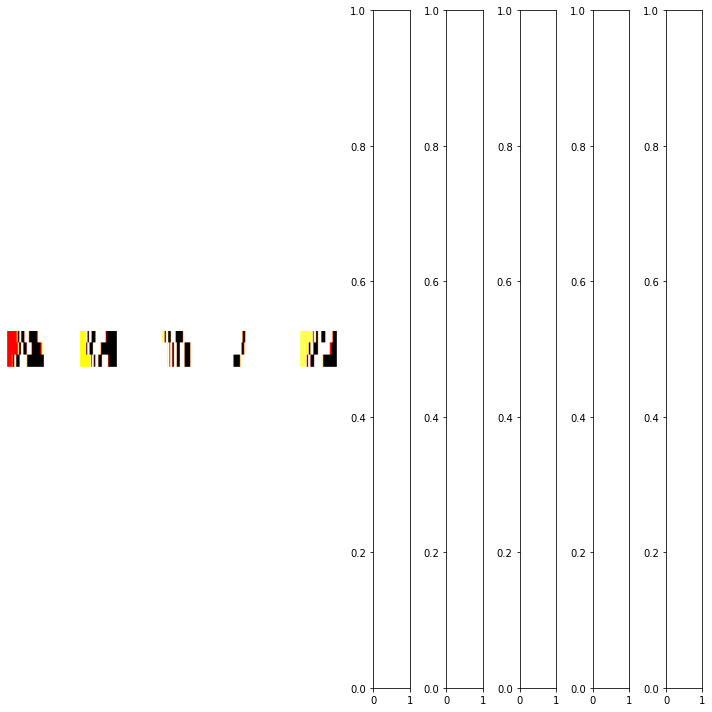

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
plotImages(imgs)
print(labels)

## Building the model

In [26]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding='same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2,2), strides=2),
        Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding='same'),
        MaxPool2D(pool_size=(2,2), strides=2),
        Flatten(),
        Dense(units=16, activation='softmax'),
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 16)                3

In [28]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(x=train_batches, validation_data=val_batches, epochs=20, verbose=2)

Epoch 1/20
153/153 - 36s - loss: 29.2629 - accuracy: 0.3882 - val_loss: 2.5487 - val_accuracy: 0.6250 - 36s/epoch - 236ms/step
Epoch 2/20
153/153 - 30s - loss: 1.4127 - accuracy: 0.7072 - val_loss: 1.4984 - val_accuracy: 0.6812 - 30s/epoch - 198ms/step
Epoch 3/20
153/153 - 31s - loss: 0.9066 - accuracy: 0.8078 - val_loss: 0.9398 - val_accuracy: 0.7812 - 31s/epoch - 200ms/step
Epoch 4/20
153/153 - 31s - loss: 0.4284 - accuracy: 0.8837 - val_loss: 0.5991 - val_accuracy: 0.8125 - 31s/epoch - 201ms/step
Epoch 5/20
153/153 - 30s - loss: 0.2950 - accuracy: 0.9137 - val_loss: 0.8291 - val_accuracy: 0.8000 - 30s/epoch - 198ms/step
Epoch 6/20
153/153 - 30s - loss: 0.2905 - accuracy: 0.9203 - val_loss: 0.9583 - val_accuracy: 0.8188 - 30s/epoch - 197ms/step
Epoch 7/20
153/153 - 30s - loss: 0.3527 - accuracy: 0.9098 - val_loss: 0.8737 - val_accuracy: 0.8188 - 30s/epoch - 198ms/step
Epoch 8/20
153/153 - 31s - loss: 0.1617 - accuracy: 0.9621 - val_loss: 0.8139 - val_accuracy: 0.8062 - 31s/epoch - 20